# Exploratory Data Analysis (EDA)

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import sklearn.metrics as met
from sklearn import tree
from sklearn.model_selection import train_test_split
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
from tqdm import tqdm

import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("../data/training_data_ra_only.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   3376 non-null   int64  
 1   pubdatetime          3376 non-null   object 
 2   publication_name     3359 non-null   object 
 3   title_h1             3361 non-null   object 
 4   text_200             3376 non-null   object 
 5   relevant             3376 non-null   int64  
 6   solution_frame       3376 non-null   int64  
 7   problem_frame        3376 non-null   int64  
 8   title_h2             203 non-null    object 
 9   articleHead          1571 non-null   object 
 10  text                 2472 non-null   object 
 11  text_lead            2366 non-null   object 
 12  text_body            2472 non-null   object 
 13  publication_type     2472 non-null   object 
 14  publication_edition  439 non-null    object 
 15  wordCount            2472 non-null   f

In [6]:
df.shape

(3376, 21)

In [7]:
df.describe()

,id,relevant,solution_frame,problem_frame,wordCount,matches,matches_count
count,3.376000e+03,3376.000000,3376.000000,3376.000000,2472.000000,2472.0,2472.000000
mean,6.107896e+05,0.169431,0.074645,0.040284,972.420307,1.0,3.904126
std,2.235486e+05,2.426953,0.262856,0.196654,490.134225,0.0,5.940698
min,1.423930e+05,0.000000,0.000000,0.000000,205.000000,1.0,1.000000
25%,4.394005e+05,0.000000,0.000000,0.000000,623.000000,1.0,1.000000
50%,5.976450e+05,0.000000,0.000000,0.000000,858.000000,1.0,2.000000
75%,8.025960e+05,0.000000,0.000000,0.000000,1231.250000,1.0,4.000000
max,1.016095e+06,99.000000,1.000000,1.000000,2491.000000,1.0,94.000000


In [8]:
df.head(10)

,id,pubdatetime,publication_name,title_h1,text_200,relevant,solution_frame,problem_frame,title_h2,articleHead,...,text_lead,text_body,publication_type,publication_edition,wordCount,country,state,city,matches,matches_count
0,804124,2021-05-10T00:00:00Z,The Hill,The Hill's 12:30 Report - Presented by Faceboo...,Presented by Facebook To view past editions of...,0,0,0,NaN,NEWS,...,Presented by Facebook To view past editions of...,Presented by Facebook To view past editions o...,Web Publication;WebLinks,NaN,2031.0,UNITED STATES,NaN,NaN,1.0,1.0
1,554905,2020-10-30T00:00:00Z,The Arizona Republic (Phoenix),'60 Minutes' interviews stark study in contrasts,Having seen both the unedited footage of Presi...,0,0,0,NaN,SURPRISE REPUBLIC 1Pg. Z1_23,...,Having seen both the unedited footage of Presi...,This is not a political observation. It's a te...,Newspaper;Newspapers,Final Chaser Edition,734.0,NaN,NaN,"PHOENIX, AZ, USA",1.0,1.0
2,798375,2021-01-05T00:00:00Z,Newstex Blogs,Is There a Case for Principled Populism From t...,"\r\n\r\nJan 05, 2021( Conservative Daily News:...",0,0,0,NaN,NaN,...,"Jan 05, 2021( Conservative Daily News:","In the past 10 years, we have seen a new entra...",Web Blog;Blogs,NaN,1689.0,UNITED STATES / CHINA / EUROPE / HUNGARY,NORTH CENTRAL CHINA,"BEIJING, CHINA",1.0,1.0
3,691445,2020-11-10T00:00:00Z,Canadian Press,Election breathes new life into false 'dead vo...,As President Donald Trump continued to assert ...,0,0,0,NaN,INTERNATIONAL,...,As President Donald Trump continued to assert ...,The false claim that deceased voters cast vote...,Newswire;Newswires & Press Releases,NaN,886.0,NaN,"MICHIGAN, USA / PENNSYLVANIA, USA / NORTH CARO...",NaN,1.0,2.0
4,490404,2020-10-07T00:00:00Z,Tampa Bay Times,Viewer's Guide: Virus response on stage with P...,Mike Pence and Kamala Harris do not have a tou...,0,0,0,The debate starting at 9 p.m. at the Universit...,NEWSNews,...,Mike Pence and Kamala Harris do not have a tou...,The 90-minute debate will be divided into nine...,Newspaper;Newspapers,NaN,1062.0,UNITED STATES,"CALIFORNIA, USA / VIRGINIA, USA","TAMPA, FL, USA",1.0,2.0
5,606923,2020-11-04T00:00:00Z,Portland Press Herald,Incumbent holds the edge in closely watched co...,FULL TEXT\r\n\r\nRepublican Sen. Susan Collins...,0,0,0,NaN,Pg. A.1,...,Republican Sen. Susan Collins was leading Demo...,"FULL TEXT---In Kennebunkport, for instance, Bi...",Newspaper;Newswires & Press Releases,NaN,1998.0,UNITED STATES,"MAINE, USA","PORTLAND, ME, USA / BANGOR, ME, USA",1.0,2.0
6,322682,2020-02-11T00:00:00Z,Maple Creek & Southwest Advance Times,The right to say what others don't want to hea...,It's been said that asking a working writer wh...,0,0,0,NaN,OPINIONPg. A4,...,It's been said that asking a working writer wh...,"Taxpayers were billed more than $130,000 in la...",Newspaper;Newspapers,Final Edition,558.0,"CANADA / CHINA / KOREA, DEMOCRATIC PEOPLE'S RE...",NaN,NaN,1.0,1.0
7,678242,2020-11-16T00:00:00Z,BBC Monitoring Former Soviet Union - Political,Russian press views Open Skies treaty's prospects,The following is a selection of quotes from ar...,0,0,0,NaN,NaN,...,The following is a selection of quotes from ar...,"Kommersant (influential business daily) ---""Ac...",Transcript;News Transcripts,NaN,1090.0,UNITED STATES / RUSSIAN FEDERATION,NaN,NaN,1.0,7.0
8,485943,2020-10-15T00:00:00Z,States News Service,CONSUMER REPORTS OPPOSES FCC RULEMAKING ON SEC...,The following information was released by Cons...,99,1,0,NaN,NaN,...,The following information was released by Cons...,"Justin Brookman, director of technology policy...",Newswire;Newswires & Press Releases,NaN,246.0,UNITED STATES,"DISTRICT OF COLUMBIA, USA",NaN,1.0,5.0
9,262441,2020-02-18T00:00:00Z,"The Independent (Massillon, Ohio)",Democrats face factionalism,W hen Sen. Amy Klobuchar broke through in the ...,0,0,0,NaN,OH OPINIONPg. A4,...,W hen Sen. Amy Klobuchar broke through in the ...,A speech that Democrats needed to hear got alm...,Newspaper;Newspapers,NaN,737.0,NaN,"OHIO, USA / NEW HAM

In [9]:
df.isna().sum() / len(df)

id                     0.000000
pubdatetime            0.000000
publication_name       0.005036
title_h1               0.004443
text_200               0.000000
relevant               0.000000
solution_frame         0.000000
problem_frame          0.000000
title_h2               0.939870
articleHead            0.534656
text                   0.267773
text_lead              0.299171
text_body              0.267773
publication_type       0.267773
publication_edition    0.869964
wordCount              0.267773
country                0.390995
state                  0.578791
city                   0.678910
matches                0.267773
matches_count          0.267773
dtype: float64

In [10]:
for ah in df[df.articleHead.notna()].articleHead.sample(frac=0.02):
    print(ah)

OPINIONPg. 1
TURKEY & IRAN
Pg. 13
NEWS
TECH LIKEFOLLOW
OPINIONSPg. 4
POLITICS
NEWSPg. A5
NEWS
U.K. REGIONAL TVNews
EDITORIALCSPg. 22
Pg. 24
POLITICSPg. 5
POLITICS
TECHNOLOGYVersion:6
NEWS
OPINIONS
Section AColumn 0National DeskPg. 25
U.S. SENATE DOCUMENTS
NEWS
STYLE
IBD 50
Pg. 4
DOMESTIC NEWSPOLITICAL NEWSSTATE AND REGIONAL
NEWSPg. B5
Pg. B-1
tom_fulks
NEWSPg. 9A
Pg. A1
NEWS
MAINAPg. 1


In [11]:
idx = np.logical_and(df.title_h1.notna(), df.relevant==1)
for ah in df[idx].title_h1.sample(frac=0.05):
    print(ah)

Joins BBC News - 03:41 AM GMT
Facebook and Twitter crack down as Donald Trump claims Covid-19 less deadly than flu
Facebook employees revolt over Zuckerberg’s stance on Trump
Facebook Just Issued a Massive QAnon Ban
How Warren would fight election disinformation
Proud Boys boast they caused 'absolute terror' during Capitol riot
Facebook says Trump's accounts will remain suspended until at least January 2023
Facebook's threat to stop distributing news in Australia is the act of a bully - and sometimes the only way to stop bullies is to use force
Chicago Dyke March Appears To Delete Ad Showing Burning American, Israeli Flags
Dutch watchdog to probe TikTok over how it handles children's data
BBC Weekend News - 5:50 PM GMT
Social media companies' ban on Donald Trump poised to continue after end of presidency
Conservative website Parler forced offline: web trackers
Twitch temporarily bans Trump account over 'hateful conduct'
Facebook Throws Up More Hurdles
SCHAKOWSKY AND BLUMENTHAL CALL ON 

In [12]:
idx = np.logical_and(df.title_h1.notna(), df.relevant==0)
for ah in df[idx].title_h1.sample(frac=0.01):
    print(ah)

Biden vows to 'get right to work' despite Trump resistance
Egan: The 37-word tweet, the trustee tussle, the test of characters
Aussie crackdown on China's TikTok
Conservatives seize on gas crunch to blame Biden, stir base
Ugliness of the presidential campaign
Jacques: After two losses, what's the future for John James?
President Trump Says 2020 Election Was Unconstitutional
Three people facing charges in relation to death of Minn. teenager who was mutilated and dumped in landfill
Let's be clear: No tracking device in vaccine
With Biden's backing, Dems revive bill to overhaul policing
QAnon is spreading amongst evangelicals. These pastors are trying to stop it
Dozens of Old Etonians threaten to withhold £2million in donations from Eton College and call for headteacher to quit after English tutor was sacked in 'toxic masculinity' lecture row
Shock Trump ban on travel from Europe as virus surges
Long lines snarl voting in Georgia primaries amid pandemic
Cunningham concedes to Tillis in NC

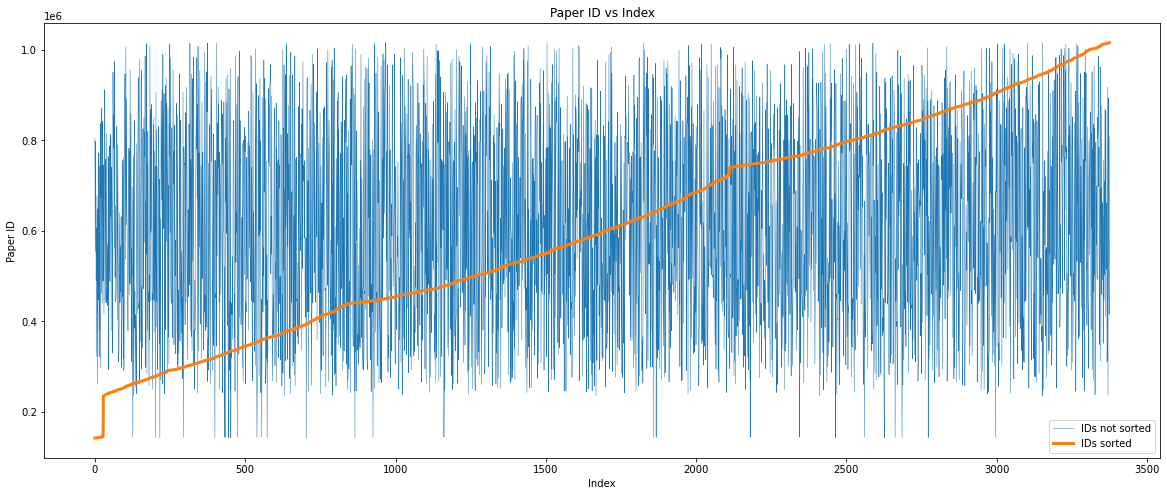

In [13]:
x, y1, y2 = np.arange(df.shape[0]), list(df.id), sorted(list(df.id))
plt.figure(figsize=(20, 8))
plt.plot(x, y1, linewidth=0.5, label="IDs not sorted");
plt.plot(x, y2, linewidth=3, label="IDs sorted");
plt.xlabel("Index");
plt.ylabel("Paper ID");
plt.title("Paper ID vs Index");
plt.legend(title_fontsize="large");

In [14]:
len(df.id.unique()) == len(df)

True

In [15]:
df.isna().sum()

id                        0
pubdatetime               0
publication_name         17
title_h1                 15
text_200                  0
relevant                  0
solution_frame            0
problem_frame             0
title_h2               3173
articleHead            1805
text                    904
text_lead              1010
text_body               904
publication_type        904
publication_edition    2937
wordCount               904
country                1320
state                  1954
city                   2292
matches                 904
matches_count           904
dtype: int64

In [16]:
for th1 in df.title_h1[:10]:
    print("-" * 60)
    print(len(th1.split()))
    print(th1)

------------------------------------------------------------
16
The Hill's 12:30 Report - Presented by Facebook - Biden reverses Trump limits on transgender protections
------------------------------------------------------------
7
'60 Minutes' interviews stark study in contrasts
------------------------------------------------------------
10
Is There a Case for Principled Populism From the GOP?
------------------------------------------------------------
9
Election breathes new life into false 'dead voter' claims
------------------------------------------------------------
9
Viewer's Guide: Virus response on stage with Pence, Harris
------------------------------------------------------------
20
Incumbent holds the edge in closely watched contest But results from many larger Maine towns have yet to be tabulated.
------------------------------------------------------------
13
The right to say what others don't want to hear; Check It Out
-------------------------------------------------

In [17]:
for t200 in df.text_200[:10]:
    print("-" * 60)
    print(len(t200.split()))
    print(t200)

------------------------------------------------------------
202
Presented by Facebook To view past editions of The Hill's 12:30 Report, click here: http://bit.ly/1M1mIfw To receive The Hill's 12:30 Report in your inbox, please sign up here: http://bit.ly/1Tt4hqN --> A midday take on what's happening in politics and how to have a sense of humor about it.* *Ha. Haha. Hahah. Sniff. Haha. Sniff. Ha--breaks down crying...

Presented by Facebook To view past editions of The Hill's 12:30 Report, click here: http://bit.ly/1M1mIfw To receive The Hill's 12:30 Report in your inbox, please sign up here: http://bit.ly/1Tt4hqN --> A midday take on what's happening in politics and how...

Presented by Facebook To view past editions of The Hill's 12:30 Report, click here: http://bit.ly/1M1mIfw To receive The Hill's 12:30 Report in your inbox, please sign up here: http://bit.ly/1Tt4hqN --> A midday take on what's happening in politics and how to have a sense of humor about it.* *Ha. Haha. Hahah. Sniff

In [18]:
df.relevant.value_counts()

0     3000
1      374
99       2
Name: relevant, dtype: int64

In [19]:
df.relevant.isna().sum()

0

In [20]:
df.solution_frame.value_counts(), df.problem_frame.value_counts()

(0    3124
 1     252
 Name: solution_frame, dtype: int64,
 0    3240
 1     136
 Name: problem_frame, dtype: int64)

In [21]:
df = df[df.relevant != 99]
print(df[["solution_frame", "problem_frame"]].value_counts())
print(df[["relevant", "problem_frame"]].value_counts())

solution_frame  problem_frame
0               0                3035
1               0                 203
0               1                  89
1               1                  47
dtype: int64
relevant  problem_frame
0         0                3000
1         0                 238
          1                 136
dtype: int64


In [22]:
df.title_h2.isna().sum() / len(df)

0.9398340248962656

In [23]:
df.drop("title_h2", axis=1, inplace=True)

In [24]:
df.isna().sum() / len(df)

id                     0.000000
pubdatetime            0.000000
publication_name       0.005039
title_h1               0.004446
text_200               0.000000
relevant               0.000000
solution_frame         0.000000
problem_frame          0.000000
articleHead            0.534381
text                   0.267931
text_lead              0.299348
text_body              0.267931
publication_type       0.267931
publication_edition    0.869887
wordCount              0.267931
country                0.391227
state                  0.578838
city                   0.678720
matches                0.267931
matches_count          0.267931
dtype: float64

In [25]:
df.articleHead[~df.articleHead.isna()].apply(len).describe()

count    1571.000000
mean       14.120306
std        11.098868
min         2.000000
25%         8.000000
50%        12.000000
75%        17.000000
max       140.000000
Name: articleHead, dtype: float64

In [26]:
df.articleHead[~df.articleHead.isna()].sample(frac=0.01)

1271           FEATURESPg. 1
934                     NEWS
2045    U.K. REGIONAL TVNews
883                  OPINION
610     US POLITICSVersion:2
391        FOOTBALLVersion:1
591                NEWSPg. 7
1645              NEWSPg. 5A
1176           BUSINESS NEWS
285            NEWSVersion:1
1107           POLITICOPICKS
1866          BUSINESSPg. B1
862                  OPINION
986                APg. A017
1535              COLUMNISTS
1983                 LETTERS
Name: articleHead, dtype: object

In [27]:
df.text[~df.text.isna()].apply(len).describe()

count     2470.000000
mean      5911.946154
std       2955.952913
min       1259.000000
25%       3809.500000
50%       5223.500000
75%       7462.000000
max      15027.000000
Name: text, dtype: float64

In [28]:
for t in df.text[~df.text.isna()].sample(frac=0.01):
    print("-" * 80)
    print(len(t.split()))
    print(t)
    print()

--------------------------------------------------------------------------------
1383


Oct 27, 2020( MarketBeat: https://www.marketbeat.com/ Delivered by Newstex) This combination of 2018-2020 photos shows, from left, Twitter CEO Jack Dorsey, Google CEO Sundar Pichai, and Facebook CEO Mark Zuckerberg. Less than a week before Election Day, the CEOs of Twitter, Facebook and Google are set to face a grilling by Republican senators who accuse the tech giants of anti-conservative bias. Democrats are trying to expand the discussion to include other issues such as the companies' heavy impact on local news. The Senate Commerce Committee has summoned Twitter CEO Jack Dorsey, Facebook's Mark Zuckerberg and Google's Sundar Pichai to testify for a hearing Wednesday.

The executives have agreed to appear remotely after being threatened with subpoenas. (AP Photo/Jose Luis Magana, LM Otero, Jens Meyer)WASHINGTON (AP) — Less than a week before Election Day, the CEOs of Twitter, Facebook and Google ar

In [29]:
df.text_lead[~df.text_lead.isna()].apply(len).describe()

count    2364.000000
mean      497.790609
std       340.663401
min        12.000000
25%       248.750000
50%       471.500000
75%       724.000000
max      1961.000000
Name: text_lead, dtype: float64

In [30]:
df.text_body[~df.text_body.isna()].apply(len).describe()

count     2470.000000
mean      4826.215789
std       2690.587032
min         39.000000
25%       2910.750000
50%       4211.000000
75%       6089.500000
max      14292.000000
Name: text_body, dtype: float64

In [31]:
df.text_lead[~df.text_lead.isna()].apply(len).describe()

count    2364.000000
mean      497.790609
std       340.663401
min        12.000000
25%       248.750000
50%       471.500000
75%       724.000000
max      1961.000000
Name: text_lead, dtype: float64

In [32]:
for t in df.text[~df.text.isna()].sample(frac=0.01):
    print("-" * 80)
    print(len(t.split()))
    print(t)
    print()

--------------------------------------------------------------------------------
1461
Attack ads are flying between two of the candidates in the three-way Republican primary for attorney general.

Voters will decide Tuesday who they want to take on Democratic Attorney General Josh Stein in the November general election. Early voting is underway.

Forsyth County District Attorney Jim O'Neill's campaign took the rare step of replacing one ad with a new version. His opponent, Chris Mumma -- the target of the ad -- had threatened legal action against a TV station if it kept running.

"The advertisement contains egregious misrepresentations of fact that will mislead North Carolina voters," wrote Mumma's lawyer, Dan Boyce.

Mumma is the executive director of the North Carolina Center on Actual Innocence, a group that investigates possible wrongful convictions. O'Neil is the top prosecutor in Forsyth County, which includes Winston-Salem.

Forsyth County prosecutors have sent at least two inno

In [33]:
temp = df[df[["text", "text_lead", "text_body"]].notna().all(axis=1)]

In [34]:
for idx, row in temp.sample(frac=0.01).iterrows():
    print("-" * 100)
    print(idx)
    print(row.text_lead in row.text)
    print(row.text_body in row.text)
    print(fuzz.ratio(row.text[:len(row.text_lead)], row.text_lead))
    print(fuzz.ratio(row.text[:len(row.text_body)], row.text_body))

----------------------------------------------------------------------------------------------------
1753
True
True
95
54
----------------------------------------------------------------------------------------------------
1627
True
False
94
39
----------------------------------------------------------------------------------------------------
959
True
True
37
87
----------------------------------------------------------------------------------------------------
472
True
True
41
82
----------------------------------------------------------------------------------------------------
2119
False
False
99
83
----------------------------------------------------------------------------------------------------
1401
False
True
99
43
----------------------------------------------------------------------------------------------------
33
True
False
100
87
----------------------------------------------------------------------------------------------------
1845
True
False
100
88
--------------------

In [34]:
lead_similarity_score, body_similarity_score = [], []
for idx, row in tqdm(temp.sample(frac=1).iterrows()):
    lead_similarity_score.append(fuzz.ratio(row.text[:len(row.text_lead)], row.text_lead))
    body_similarity_score.append(fuzz.ratio(row.text[len(row.text_lead):len(row.text_lead) + len(row.text_body)], row.text_body))

2364it [01:22, 28.63it/s]


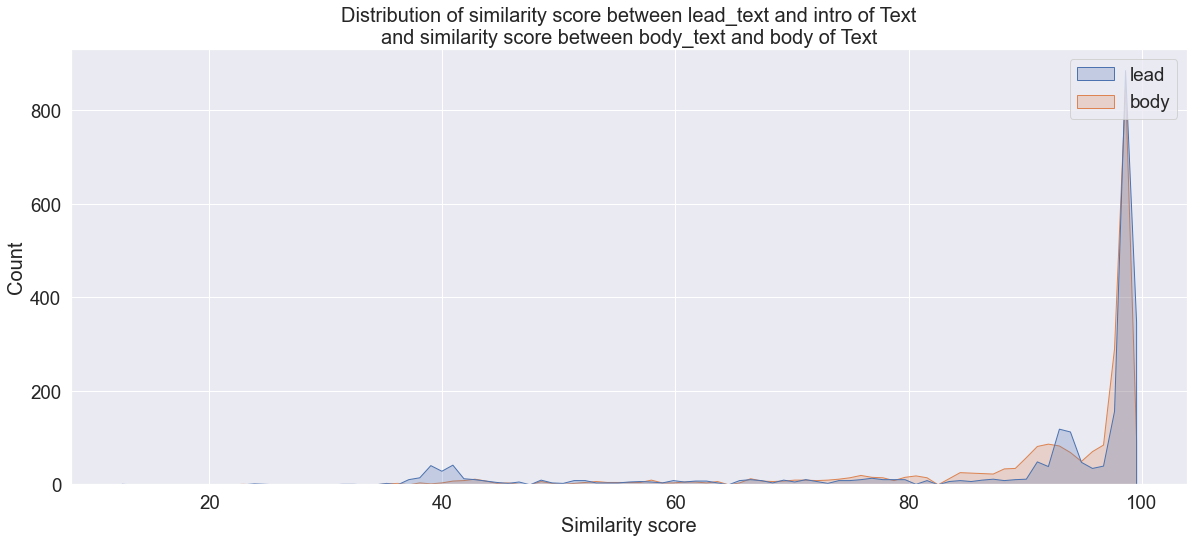

In [35]:
sim_scores = pd.DataFrame()
sim_scores["lead"] = lead_similarity_score
sim_scores["body"] = body_similarity_score

plt.figure(figsize=(20, 8))
sns.set_theme(style="whitegrid")
sns.set(font_scale=1.7)
sns.histplot(sim_scores, element="poly",  legend=True);
plt.title("Distribution of similarity score between lead_text and intro of Text\nand similarity score between body_text and body of Text", fontsize=20);
plt.xlabel("Similarity score", fontsize=20);
plt.ylabel("Count", fontsize=20);
# plt.legend(loc='center right')

#### my interpretation: text_lead in supposed to be the intro of "Text" and text_body is supposed to be the rest of the text

In [35]:
len(df.publication_type.unique())

50

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3374 entries, 0 to 3375
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   3374 non-null   int64  
 1   pubdatetime          3374 non-null   object 
 2   publication_name     3357 non-null   object 
 3   title_h1             3359 non-null   object 
 4   text_200             3374 non-null   object 
 5   relevant             3374 non-null   int64  
 6   solution_frame       3374 non-null   int64  
 7   problem_frame        3374 non-null   int64  
 8   articleHead          1571 non-null   object 
 9   text                 2470 non-null   object 
 10  text_lead            2364 non-null   object 
 11  text_body            2470 non-null   object 
 12  publication_type     2470 non-null   object 
 13  publication_edition  439 non-null    object 
 14  wordCount            2470 non-null   float64
 15  country              2054 non-null   o

In [37]:
df.isna().sum() / len(df)

id                     0.000000
pubdatetime            0.000000
publication_name       0.005039
title_h1               0.004446
text_200               0.000000
relevant               0.000000
solution_frame         0.000000
problem_frame          0.000000
articleHead            0.534381
text                   0.267931
text_lead              0.299348
text_body              0.267931
publication_type       0.267931
publication_edition    0.869887
wordCount              0.267931
country                0.391227
state                  0.578838
city                   0.678720
matches                0.267931
matches_count          0.267931
dtype: float64

In [38]:
for pt in df.publication_type.unique():
    print(pt)

Web Publication;WebLinks
Newspaper;Newspapers
Web Blog;Blogs
Newswire;Newswires & Press Releases
Newspaper;Newswires & Press Releases
Transcript;News Transcripts
Web Publication;Web-based Publications
Magazine;Magazines & Journals
Other, Newswire;Aggregate News Sources
Newspaper; Web Publication;Web-based Publications
Newspaper;Web-based Publications
Newswire;Newspapers
Newspapers
Magazine;Industry Trade Press
Others;Aggregate News Sources
Web Blog;Newspapers
Web Publication;Newspapers
Report;Country & Region Reports
Report;Aggregate News Sources
Newspaper; Web Publication;Newspapers
Blogs;Industry Trade Press
Wire;Newswires & Press Releases
Newsletter;Newsletters
Transcript;Video
Web Publication;Magazines & Journals
Web Publication;Industry Trade Press
Newspaper;News
Web Publication;News
Newswire;Industry Trade Press
Newspaper;Newsletters
Magazine;News Transcripts
NEWSPAPER;Newspapers
Newsletter;Newspapers
Other, Magazine/Journal;Aggregate News Sources
Nespaper;Newspapers
Web Publicat

In [39]:
for pt in df.publication_edition.unique():
    print(pt)

nan
Final Chaser Edition
Final Edition
FIRST Edition
Pune Edition
Web Edition
Australian Edition
1 Edition
GAD-Times Edition
Schenectady/Albany: Final Edition
Print & Internet Editions
FINAL EDITION
Late Edition - Final
Quebec Edition
Buffalo News Edition
WEB EditionNC1 EditionNC2 EditionMF12 EditionNC3 EditionNM1 EditionNC EditionNC14 EditionMC1 EditionMC3 EditionMD1 EditionML2 EditionNL1 EditionNC14C EditionNC4 EditionCLFM EditioneBlast Edition
MM1 Edition
ACO-Statesman Edition
Edition 1, National Edition
E1 Edition
ALL EDITION
Print & First Editions
Early Edition
First Edition
Second Edition
1 EDITION
Print Edition
SAR-HeraldTrib Edition
Mumbai Edition
Delhi Edition
Edition 1, Scotland
Kolkata Edition
A Edition
CPD - MAIN EDITION
1, HeraldTrib Edition
Houston Edition
Both Edition
METRO EDITION
Worcester TG Edition
FIRST EDITION
British_Columbia Edition
01 Edition
National Edition
WAY-RecordHerald Edition
Digital Edition
Sunrise Edition
PN LOCAL EDITION
UOD-Advance Edition
FRA-Melros

In [40]:
abs(df[df.wordCount.notna()]["text"].apply(lambda x: len(x.split()))\
    - df[df.wordCount.notna()].wordCount).sum() / len(df[df.wordCount.notna()])

64.21295546558704

In [41]:
df[df.wordCount.notna()]["text"].apply(lambda x: len(x.split())).mean()

934.2165991902834

#### My interpretation: the word count column is supposed to be the word count of text

In [42]:
for c in df.country.unique():
    print(c)

UNITED STATES
nan
UNITED STATES / CHINA / EUROPE / HUNGARY
CANADA / CHINA / KOREA, DEMOCRATIC PEOPLE'S REPUBLIC OF
UNITED STATES / RUSSIAN FEDERATION
PAKISTAN
EUROPE / UNITED KINGDOM / NORTHERN EUROPE
INDIA
IRAQ / UNITED STATES
INDIA / GERMANY / PAKISTAN
NEW ZEALAND / FRANCE / UNITED KINGDOM / UNITED STATES
UNITED STATES / CHINA
UNITED STATES / UNITED KINGDOM
PAKISTAN / ASIA
HUNGARY / AUSTRIA
UNITED KINGDOM
AUSTRALIA / UNITED KINGDOM / UNITED STATES
UNITED STATES / TURKEY
UNITED STATES / CHINA / RUSSIAN FEDERATION
UKRAINE / UNITED STATES
CANADA
UNITED STATES / GERMANY
CHINA / HONG KONG / TAIWAN / UNITED STATES
UNITED KINGDOM / EUROPE / UNITED STATES
NIGERIA / UNITED STATES
UNITED STATES / AFGHANISTAN / GERMANY / NORTH AMERICA
AUSTRALIA
EUROPE / UNITED KINGDOM
UNITED STATES / CHINA / CANADA / NEW ZEALAND / AUSTRALIA / AUSTRALIA & NEW ZEALAND
AUSTRALIA / CHINA / UNITED STATES
INDIA / ASIA / CENTRAL ASIA / UNITED STATES
AUSTRALIA / CHINA / NEW ZEALAND / ASIA / UNITED STATES / EASTERN ASIA

In [43]:
df.state

0                                                     NaN
1                                                     NaN
2                                     NORTH CENTRAL CHINA
3       MICHIGAN, USA / PENNSYLVANIA, USA / NORTH CARO...
4                         CALIFORNIA, USA / VIRGINIA, USA
                              ...                        
3371                                                  NaN
3372                                                  NaN
3373                                                  NaN
3374                                                  NaN
3375                                                  NaN
Name: state, Length: 3374, dtype: object

In [44]:
df.city

0                    NaN
1       PHOENIX, AZ, USA
2         BEIJING, CHINA
3                    NaN
4         TAMPA, FL, USA
              ...       
3371                 NaN
3372                 NaN
3373                 NaN
3374                 NaN
3375                 NaN
Name: city, Length: 3374, dtype: object

In [45]:
df.matches.unique()

array([ 1., nan])

In [46]:
df.matches_count.unique()

array([ 1.,  2.,  7., 10., 14., 20., 15., 13., 49., 11.,  8.,  6.,  9.,
        5., 16.,  4., 25., 21.,  3., 28., 12., 18., 23., 45., 17., 26.,
       34., 51., 29., 19., 33., 30., 22., 27., 38., 32., 37., 24., 73.,
       31., 35., 41., 39., 40., 94., nan])

In [47]:
df.matches_count.describe()

count    2470.000000
mean        3.902429
std         5.942736
min         1.000000
25%         1.000000
50%         2.000000
75%         4.000000
max        94.000000
Name: matches_count, dtype: float64

##### --------------------------------------------------

In [48]:
temp = df[["text", "text_lead", "text_body"]]

In [49]:
temp[temp.isna().all(axis=1)]

,text,text_lead,text_body
2472,NaN,NaN,NaN
2473,NaN,NaN,NaN
2474,NaN,NaN,NaN
2475,NaN,NaN,NaN
2476,NaN,NaN,NaN
...,...,...,...
3371,NaN,NaN,NaN
3372,NaN,NaN,NaN
3373,NaN,NaN,NaN
3374,NaN,NaN,NaN


In [50]:
df = df[~temp.isna().all(axis=1)]

In [51]:
df[["text", "text_lead", "text_body"]].isna().sum()

text           0
text_lead    106
text_body      0
dtype: int64

In [52]:
df.drop_duplicates(subset="text", keep='first', inplace=True, ignore_index=True)

In [53]:
simple_df = df[["id", "relevant", "text"]]

In [54]:
simple_df.isna().sum() / len(simple_df)

id          0.0
relevant    0.0
text        0.0
dtype: float64

In [55]:
simple_df.to_csv("simple_data.csv")

In [56]:
simple_df.shape

(2457, 3)

In [57]:
df.shape

(2457, 20)

In [58]:
from preprocessing.preprocessing import Preprocessor
preprocessor = Preprocessor()

In [60]:
temp_df = pd.DataFrame()
temp_df["text"] = df[df.text.notna()].text
temp_df["y"] = df[df.text.notna()].relevant
temp_df = preprocessor.perform_clean_lemmatize_tokenize(temp_df, "text")

100%|██████████████████████████████████████████████████████████████████████████████████████| 2457/2457 [00:06<00:00, 356.65it/s]


In [61]:
temp_df

,text,y,cleaned_text,lemmatized_text,tokens_text
0,Presented by Facebook To view past editions of...,0,presented facebook view past editions hills 12...,present facebook view past editions hill 1230 ...,"[present, facebook, view, past, editions, hill..."
1,Having seen both the unedited footage of Presi...,0,seen unedited footage president donald trumps ...,see unedited footage president donald trump in...,"[see, unedited, footage, president, donald, tr..."
2,"\n\nJan 05, 2021( Conservative Daily News: htt...",0,jan 05 2021 conservative daily news delivered ...,jan 05 2021 conservative daily news deliver ne...,"[jan, 05, 2021, conservative, daily, news, del..."
3,As President Donald Trump continued to assert ...,0,president donald trump continued assert withou...,president donald trump continue assert without...,"[president, donald, trump, continue, assert, w..."
4,Mike Pence and Kamala Harris do not have a tou...,0,mike pence kamala harris tough act followthe v...,mike pence kamala harris tough act followthe v...,"[mike, pence, kamala, harris, tough, act, foll..."
...,...,...,...,...,...
2452,(Alliance News) - European nations vowed Wedne...,0,alliance news european nations vowed wednesday...,alliance news european nations vow wednesday g...,"[alliance, news, european, nations, vow, wedne..."
2453,Northeastern University issued the following n...,0,northeastern university issued following news ...,northeastern university issue follow news meme...,"[northeastern, university, issue, follow, news..."
2454,"By Indira Guerrero\n\nNew Delhi, June 21 (EFE)...",0,indira guerrero new delhi june 21 efe amid cor...,indira guerrero new delhi june 21 efe amid cor...,"[indira, guerrero, new, delhi, june, 21, efe, ..."
2455,While Wieden + Kennedy has spent recent weeks ...,0,wieden kennedy spent recent weeks launching wo...,wieden kennedy spend recent weeks launch work ...,"[wieden, kennedy, spend, recent, weeks, launch..."


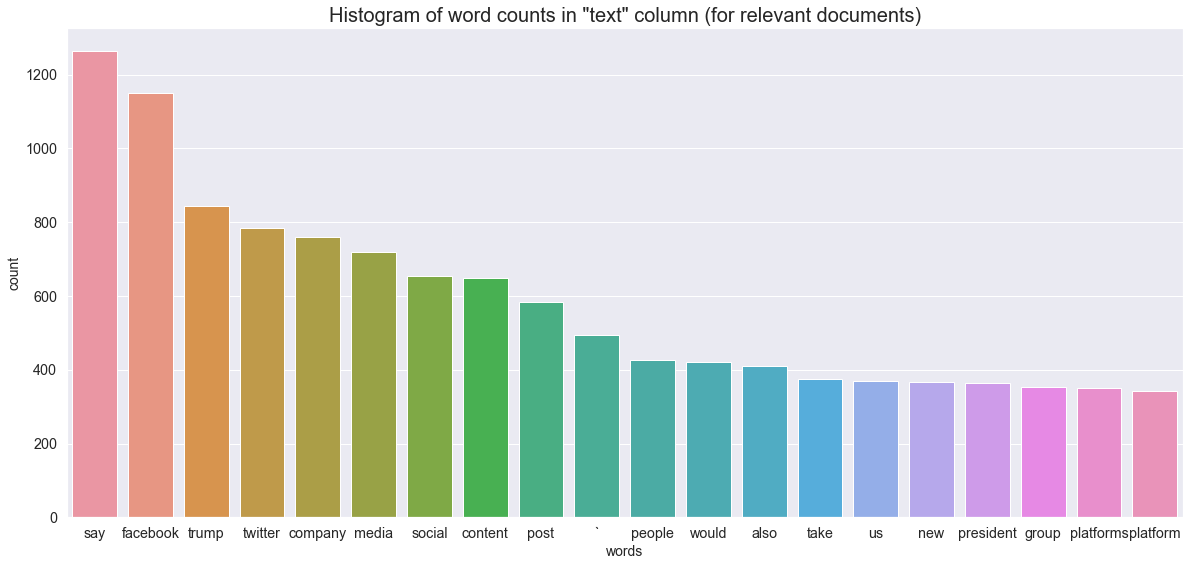

In [67]:
y_ = 1
words = temp_df[temp_df.y==y_].tokens_text.explode().value_counts().head(20).index
values = list(temp_df[temp_df.y==y_].tokens_text.explode().value_counts().head(20))
plt.figure(figsize=(20, 9))
sns.set_theme(style="whitegrid")
sns.set(font_scale=1.3)
sns.barplot(words, values);
plt.title('Histogram of word counts in "text" column (for relevant documents)', fontsize=20)
plt.xlabel("words", fontsize=14);
plt.ylabel("count", fontsize=14);

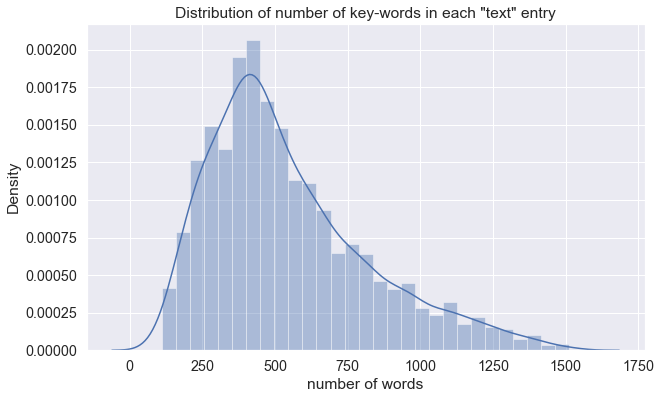

In [69]:
plt.figure(figsize=(10, 6))
sns.distplot(temp_df.tokens_text.apply(len));
plt.title('Distribution of number of key-words in each "text" entry')
plt.xlabel("number of words");

In [70]:
temp_df = pd.DataFrame()
temp_df["title"] = df[df.title_h1.notna()].title_h1
temp_df["y"] = df[df.title_h1.notna()].relevant
temp_df = preprocessor.perform_clean_lemmatize_tokenize(temp_df, "title")

100%|████████████████████████████████████████████████████████████████████████████████████| 2446/2446 [00:00<00:00, 26860.17it/s]


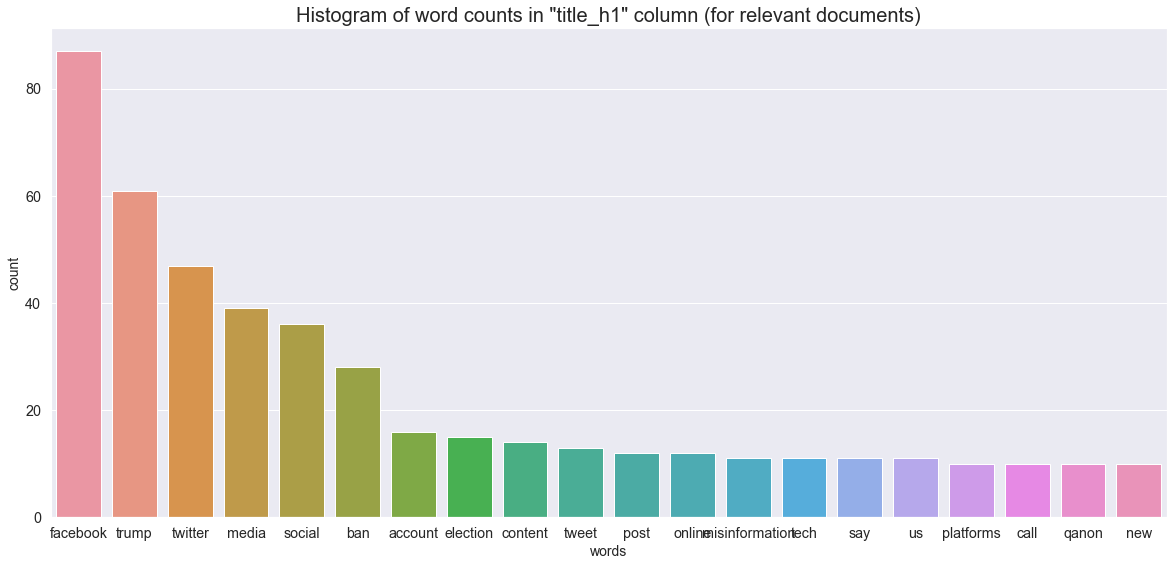

In [74]:
y_ = 1
words = temp_df[temp_df.y==y_].tokens_title.explode().value_counts().head(20).index
values = list(temp_df[temp_df.y==y_].tokens_title.explode().value_counts().head(20))
plt.figure(figsize=(20, 9))
sns.set_theme(style="whitegrid")
sns.set(font_scale=1.3)
sns.barplot(words, values);
plt.title('Histogram of word counts in "title_h1" column (for relevant documents)', fontsize=20)
plt.xlabel("words", fontsize=14);
plt.ylabel("count", fontsize=14);

# ------------------------------------------------------------------------------------

In [98]:
idx = 5
x = df.text[2:10]
temp_df = pd.DataFrame()
temp_df["x"] = x
cq = preprocessor.clean_query(x[idx])
pl = preprocessor.perform_clean_lemmatize_tokenize(temp_df, "x")

100%|████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 257.57it/s]


In [100]:
for w, z in zip(pl.tokens_x[idx], cq):
    print(w, z)

full full
text text
republican republican
sen sen
susan susan
collins collins
lead lead
democratic democratic
challenger challenger
sara sara
gideon gideon
initial initial
vote vote
result result
late late
tuesday tuesday
recordsetting recordsetting
us us
senate senate
race race
national national
implications implications
result result
many many
towns towns
still still
outstanding outstanding
late late
tuesday tuesday
particularly particularly
among among
populous populous
communities communities
southern southern
coastal coastal
maine maine
collins collins
maintain maintain
sizable sizable
lead lead
gideon gideon
41 41
percent percent
precincts precincts
report report
1130 1130
pm pm
collins collins
lead lead
gideon gideon
52 52
percent percent
41 41
percent percent
independents independents
lisa lisa
savage savage
max max
linn linn
5 5
percent percent
2 2
percent percent
respecti respecti
havely havely
control control
us us
senate senate
stake stake
outside outside
group group
spend 

2nd 10
congressional time
district higher
race 2018
previously 2nd
maines congressional
expensi district
race race
throughout previously
campaign maines
gideon expensi
campaign race
message throughout
susan campaign
collins gideon
change campaign
24year message
career susan
longer collins
adequately change
represent 24year
interest career
mainers longer
gideon adequately
campaign represent
point interest
collins mainers
support gideon
kavanaugh campaign
2017 point
republican collins
tax support
cut kavanaugh
bill 2017
opposition republican
article tax
impeachment cut
trump bill
accuse opposition
vote article
president impeachment
mcconnell trump
count accuse
dissent vote
less president
consequential mcconnell
constantly count
remind dissent
voters less
national consequential
implications constantly
maines remind
senate voters
race national
gideon implications
often maines
say senate
vote race
collins gideon
vote often
keep say
mcconnell vote
power collins
seat vote
senate keep
majority

In [89]:
cq

['jan',
 '05',
 '2021',
 'conservative',
 'daily',
 'news',
 'deliver',
 'newstex',
 'populism',
 'term',
 'since',
 'modern',
 'era',
 'generally',
 'trot',
 'mean',
 'political',
 'attitude',
 'reflect',
 'widespread',
 'anger',
 'resentment',
 'powerful',
 'elites',
 'among',
 'stenographers',
 'powerful',
 'use',
 'reflexively',
 'warn',
 'passions',
 'mob',
 'use',
 'word',
 'project',
 'onto',
 'endless',
 'array',
 'evolve',
 'political',
 'constituencies',
 'tell',
 'us',
 'lot',
 'political',
 'moment',
 'since',
 'financial',
 'crises',
 'postreconstruction',
 'era',
 'term',
 'embrace',
 'reformers',
 'democraticallyminded',
 'movements',
 'argue',
 'universal',
 'social',
 'program',
 'publicinterest',
 'regulation',
 'federal',
 'state',
 'level',
 'early',
 'part',
 'century',
 'saw',
 'populism',
 'use',
 'describe',
 'nationalist',
 'counterpolitics',
 'emerge',
 'response',
 'european',
 'integration',
 'process',
 'italy',
 'hungary',
 'poland',
 'past',
 '10',
 'year

In [93]:
pl.tokens_x[2]

['jan',
 '05',
 '2021',
 'conservative',
 'daily',
 'news',
 'deliver',
 'newstex',
 'populism',
 'term',
 'since',
 'modern',
 'era',
 'generally',
 'trot',
 'mean',
 'political',
 'attitude',
 'reflect',
 'widespread',
 'anger',
 'resentment',
 'powerful',
 'elites',
 'among',
 'stenographers',
 'powerful',
 'use',
 'reflexively',
 'warn',
 'passions',
 'mob',
 'use',
 'word',
 'project',
 'onto',
 'endless',
 'array',
 'evolve',
 'political',
 'constituencies',
 'tell',
 'us',
 'lot',
 'political',
 'moment',
 'since',
 'financial',
 'crises',
 'postreconstruction',
 'era',
 'term',
 'embrace',
 'reformers',
 'democraticallyminded',
 'movements',
 'argue',
 'universal',
 'social',
 'program',
 'publicinterest',
 'regulation',
 'federal',
 'state',
 'level',
 'early',
 'part',
 'century',
 'saw',
 'populism',
 'use',
 'describe',
 'nationalist',
 'counterpolitics',
 'emerge',
 'response',
 'european',
 'integration',
 'process',
 'italy',
 'hungary',
 'poland',
 'past',
 '10',
 'year